# ✅ Problem Statement

## 🧠 Title: Predicting Sleep Quality Based on Lifestyle and Health Factors Using Linear Regression

---

### 📌 Statement:

In today's fast-paced world, sleep quality is increasingly affected by modern lifestyle habits such as **screen time**, **caffeine consumption**, **physical activity**, and **stress**.  
This project aims to build a **machine learning model** that predicts an individual’s **sleep quality score (on a scale of 1 to 10)** using measurable lifestyle and health-related factors like:

- Age  
- Physical Activity Level  
- Stress Level  
- BMI Category  
- Heart Rate  
- Daily Steps  
- Blood Pressure (Systolic & Diastolic)

By leveraging **linear regression**, this model will help uncover patterns in the data and provide **actionable insights** for improving sleep hygiene and overall well-being.


In [2]:
# --------------------------------------
# 📦 IMPORTS (with explanations)
# --------------------------------------

# 🔢 NumPy: For numerical operations, arrays, and feature engineering
import numpy as np

# 📊 Matplotlib: For creating scatter plots, line graphs, and general data visualizations
import matplotlib.pyplot as plt

# 🎨 Seaborn: For beautiful, high-level statistical visualizations (like bar plots)
import seaborn as sns

# 🧮 Pandas: For handling and visualizing structured tabular data (like DataFrames for bar plots)
import pandas as pd

# 🤖 Linear Regression: Core ML model used to predict Sleep Quality based on features
from sklearn.linear_model import LinearRegression

# ⚖️ StandardScaler: Used to normalize feature scales (important before polynomial expansion)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# 🔀 Train/Test Split: For splitting dataset into training, validation, and testing sets
from sklearn.model_selection import train_test_split

# 📏 Model Evaluation Metrics:
# - MSE: Measures average squared error between actual & predicted
# - MAE: Measures average absolute error
# - R²: Measures how well the model explains variance in the target
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# --------------------------------------
# 📅 LOAD COMPLETE DATA
# --------------------------------------

import numpy as np
from pathlib import Path

# For Jupyter notebooks: use simple relative path
csv_path = Path("Sleep_health_and_lifestyle_dataset_Numbers_only.csv")

# We load the numeric dataset (already preprocessed) using numpy.
data = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Assign feature names to each column for reference and plotting
full_feature_names = [
    "Person ID", "Gender", "Age (years)", "Sleep Duration (hrs)", "Sleep Quality (1–10)",
    "Physical Activity (min/day)", "Stress Level (1–10)", "BMI Category (0–3)", "Heart Rate",
    "Daily Steps", "Sleep Disorder (0=None, 1=Insomnia, 2=Apnea)", "Occupation Type"
]

# Extract the target variable: Sleep Quality
y = data[:, 4]
print("\n" + "-" * 80 + "\n")



--------------------------------------------------------------------------------




📊 Let's explore how each feature relates to Sleep Quality...



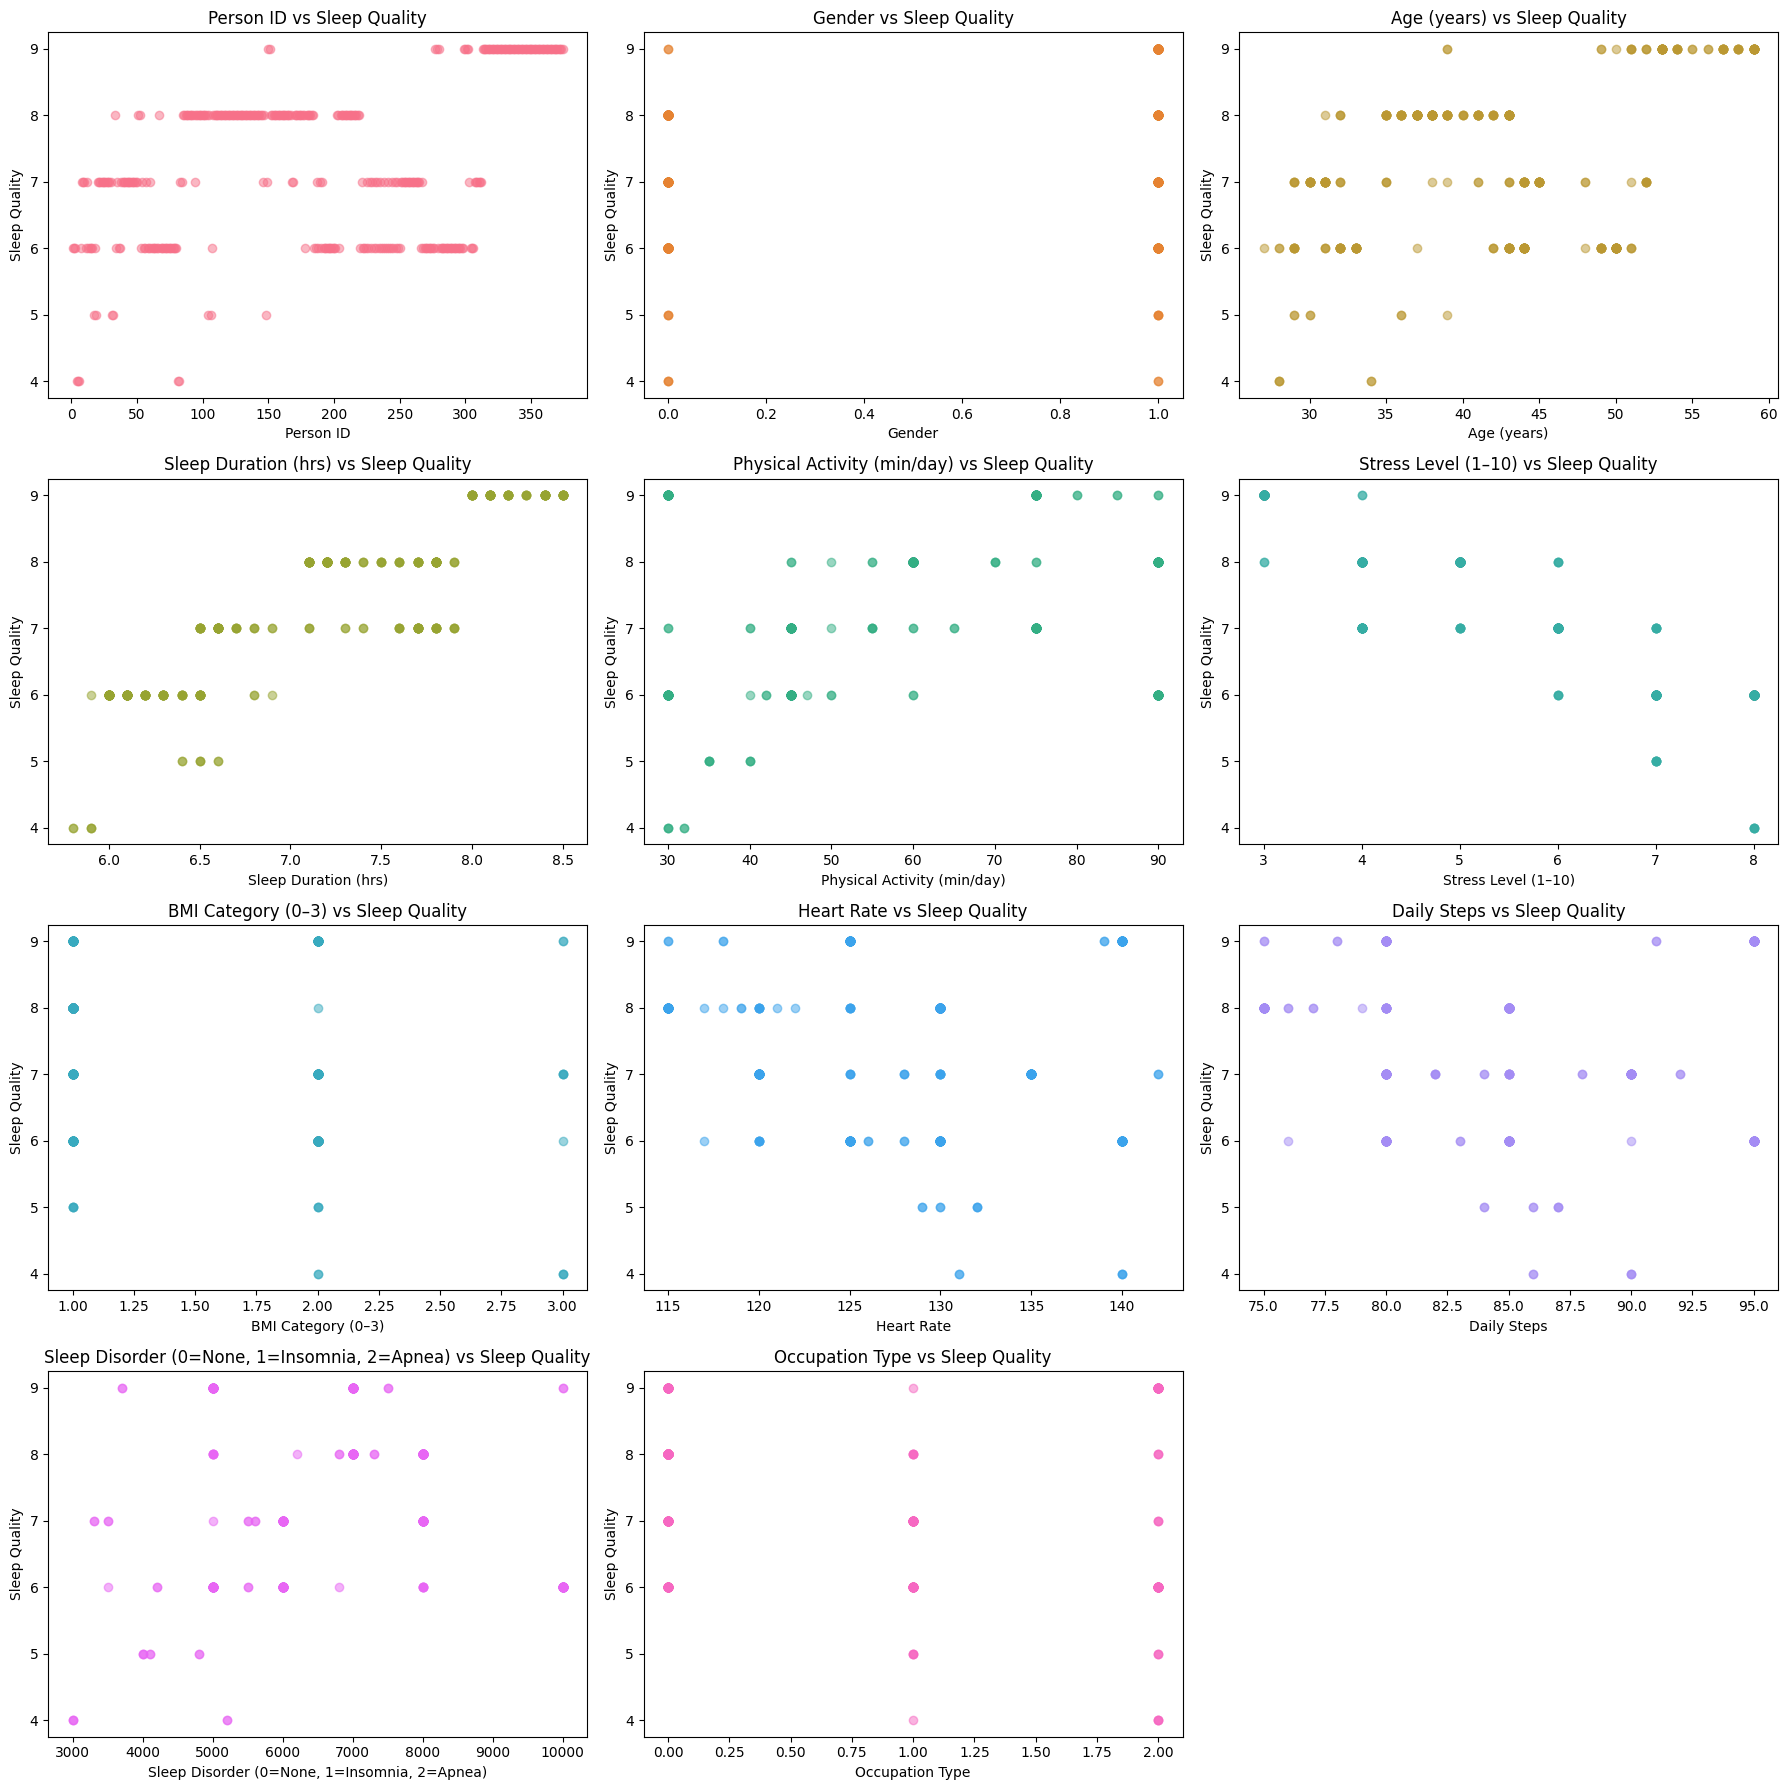


--------------------------------------------------------------------------------



In [5]:
# --------------------------------------
# 📊 SCATTER PLOTS: All Features vs Sleep Quality
# --------------------------------------
# Plot each feature against sleep quality to observe visible trends or patterns
print("\n📊 Let's explore how each feature relates to Sleep Quality...\n")
plt.figure(figsize=(18, 18))
colors = sns.color_palette("husl", len(full_feature_names))

for i, name in enumerate(full_feature_names):
    if i == 4:  # Skip the target column itself
        continue
    plt.subplot(4, 3, i + 1 if i < 4 else i)
    plt.scatter(data[:, i], y, alpha=0.5, color=colors[i])
    plt.title(f"{name} vs Sleep Quality")
    plt.xlabel(name)
    plt.ylabel("Sleep Quality")

plt.tight_layout()
plt.show()
print("\n" + "-" * 80 + "\n")



🔍 Let’s identify the most influential features using a simple linear model...



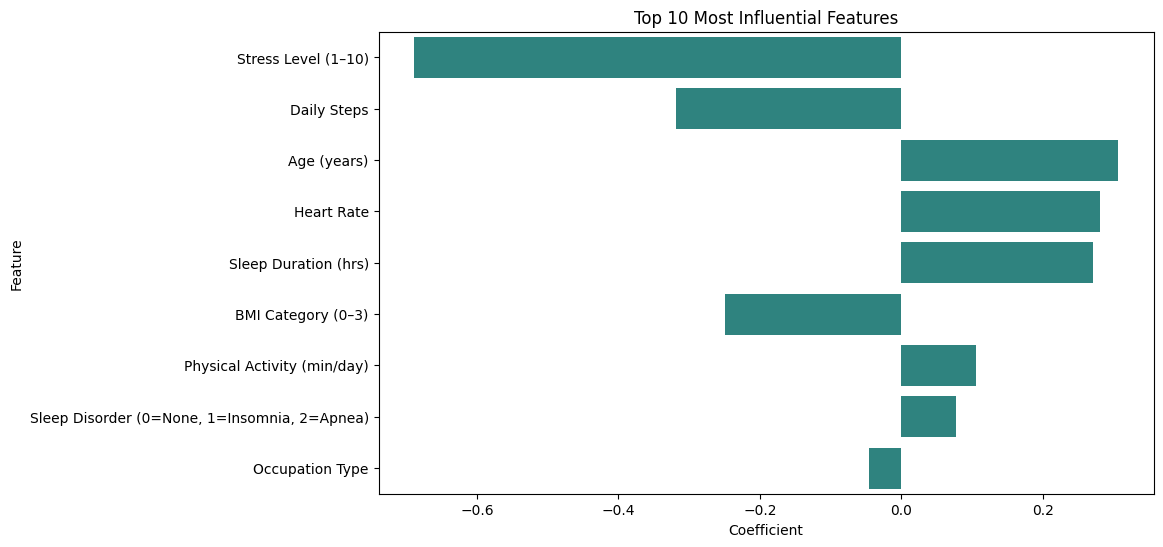


--------------------------------------------------------------------------------



In [6]:
# --------------------------------------
# 🔍 FEATURE IMPORTANCE (from full set)
# --------------------------------------
# Use a linear regression model to estimate the importance of each feature
print("\n🔍 Let’s identify the most influential features using a simple linear model...\n")
X_all = np.delete(data, [0, 1, 4], axis=1)  # Exclude ID, gender, and target from input features
temp_names = [name for i, name in enumerate(full_feature_names) if i not in [0, 1, 4]]

scaler_temp = StandardScaler()
X_all_scaled = scaler_temp.fit_transform(X_all)  # Standardize for fair coefficient comparison

model_temp = LinearRegression()
model_temp.fit(X_all_scaled, y)
coefs = model_temp.coef_
top_indices = np.argsort(np.abs(coefs))[::-1][:10]  # Get top 10 features with highest absolute impact

# Create DataFrame for better plotting with seaborn
# Add DummyHue to avoid FutureWarning in newer seaborn versions
top_features = np.array(temp_names)[top_indices]
top_coefs = coefs[top_indices]
df_bar = pd.DataFrame({
    "Feature": top_features,
    "Coefficient": top_coefs,
    "DummyHue": ["All"] * len(top_features)
})

# Plot the top 10 features with highest influence on Sleep Quality
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_bar,
    x="Coefficient",
    y="Feature",
    hue="DummyHue",
    palette="viridis",
    legend=False
)
plt.title("Top 10 Most Influential Features")
plt.show()
print("\n" + "-" * 80 + "\n")

In [7]:
# --------------------------------------
# 🧠 SELECTED FEATURES BASED ON IMPORTANCE
# --------------------------------------
# We select the most impactful features manually based on the bar plot above
print("\n✅ Now that we know which features are most important, let’s use those to train our model!\n")
feature_indices = [2, 3, 5, 6, 7, 10, 11]  # Indexes of the selected important features
feature_names = [
    "Age (years)",
    "Sleep Duration (hrs)",
    "Physical Activity (min/day)",
    "Stress Level (1–10)",
    "BMI Category (0–3)",
    "Daily Steps",
    "Sleep Disorder (0=None, 1=Insomnia, 2=Apnea)"
]

# Extract those features from the dataset
X = data[:, feature_indices]

# Add an interaction term between sleep duration and activity (useful compound feature)
interaction_term = (X[:, 1] * X[:, 2]).reshape(-1, 1)
X = np.hstack((X, interaction_term))
feature_names.append("Sleep × Activity")
print("\n" + "-" * 80 + "\n")


✅ Now that we know which features are most important, let’s use those to train our model!


--------------------------------------------------------------------------------



In [8]:
# --------------------------------------
# 🔀 SPLIT & SCALE OUR DATA
# --------------------------------------
# Split data into Train (60%), Cross-Validation (20%), and Test (20%)
scaler_base = StandardScaler()
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scale the input data
X_train_scaled = scaler_base.fit_transform(X_train)
X_cv_scaled = scaler_base.transform(X_cv)
X_test_scaled = scaler_base.transform(X_test)
print("\n" + "-" * 80 + "\n")


--------------------------------------------------------------------------------



In [9]:
# --------------------------------------
# 🔁 POLYNOMIAL DEGREE SEARCH
# --------------------------------------
# Try polynomial models from degree 1 to 10 to find the best fit
print("\n🔧 Let’s find the best polynomial degree for our model...\n")
train_mses, cv_mses, models, polys, scalers = [], [], [], [], []

for degree in range(1, 11):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    scaler_poly = StandardScaler()
    X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)

    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train)

    # Predict on CV set
    X_cv_poly = poly.transform(X_cv_scaled)
    X_cv_poly_scaled = scaler_poly.transform(X_cv_poly)

    yhat_train = model.predict(X_train_poly_scaled)
    yhat_cv = model.predict(X_cv_poly_scaled)

    train_mse = mean_squared_error(y_train, yhat_train) / 2
    cv_mse = mean_squared_error(y_cv, yhat_cv) / 2

    # Save results
    train_mses.append(train_mse)
    cv_mses.append(cv_mse)
    models.append(model)
    polys.append(poly)
    scalers.append(scaler_poly)

    print(f"Degree {degree}: Train MSE = {train_mse:.4f}, CV MSE = {cv_mse:.4f}")

print("\n" + "-" * 80 + "\n")


🔧 Let’s find the best polynomial degree for our model...

Degree 1: Train MSE = 0.0463, CV MSE = 0.0600
Degree 2: Train MSE = 0.0094, CV MSE = 0.1663
Degree 3: Train MSE = 0.0000, CV MSE = 1426.0839
Degree 4: Train MSE = 0.0000, CV MSE = 2.9477
Degree 5: Train MSE = 0.0000, CV MSE = 3.8436
Degree 6: Train MSE = 0.0000, CV MSE = 5.5966
Degree 7: Train MSE = 0.0000, CV MSE = 4.4086
Degree 8: Train MSE = 0.0000, CV MSE = 6.8170
Degree 9: Train MSE = 0.0000, CV MSE = 4.0292
Degree 10: Train MSE = 0.0000, CV MSE = 13.9513

--------------------------------------------------------------------------------



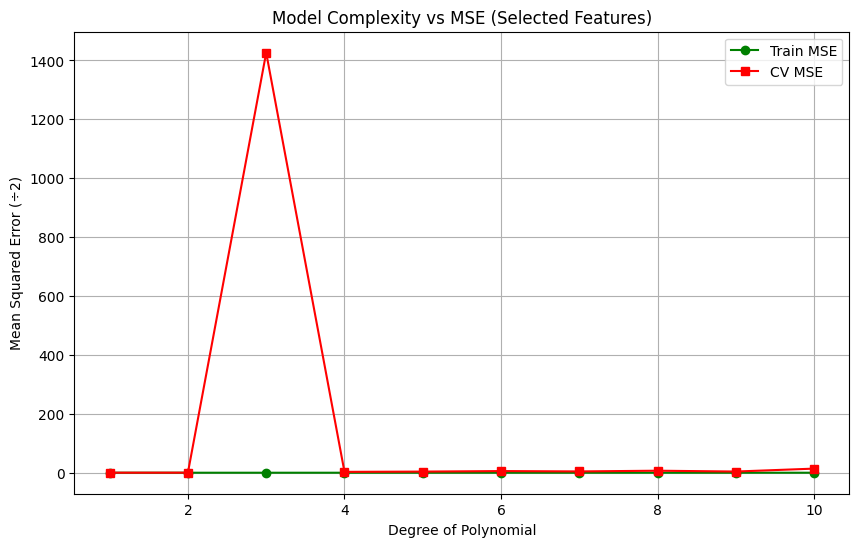


--------------------------------------------------------------------------------



In [10]:
# --------------------------------------
# 📈 VISUALIZE MSE TRENDS
# --------------------------------------
# Plot training and CV error to select a suitable degree
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_mses, marker='o', label="Train MSE", color='green')
plt.plot(range(1, 11), cv_mses, marker='s', label="CV MSE", color='red')
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error (÷2)")
plt.title("Model Complexity vs MSE (Selected Features)")
plt.legend()
plt.grid(True)
plt.show()
print("\n" + "-" * 80 + "\n")

In [11]:
# --------------------------------------
# ✅ SELECT BEST MODEL FOR US
# --------------------------------------
# Choose the model with the lowest CV MSE
best_degree = np.argmin(cv_mses) + 1
print(f"\n✅ We’re choosing polynomial degree {best_degree} for our final model.")

poly = polys[best_degree - 1]
scaler_poly = scalers[best_degree - 1]
model = models[best_degree - 1]

# Final preprocessing for all sets
X_train_poly = poly.transform(X_train_scaled)
X_train_poly_scaled = scaler_poly.transform(X_train_poly)
X_cv_poly = poly.transform(X_cv_scaled)
X_cv_poly_scaled = scaler_poly.transform(X_cv_poly)
X_test_poly = poly.transform(X_test_scaled)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)
print("\n" + "-" * 80 + "\n")


✅ We’re choosing polynomial degree 1 for our final model.

--------------------------------------------------------------------------------



In [12]:
# --------------------------------------
# 🌟 FINAL METRICS FOR OUR MODEL
# --------------------------------------
# Define evaluation function for reusability
def evaluate(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {label} Set Metrics:")
    print(f"MSE   : {mse:.4f}")
    print(f"RMSE  : {rmse:.4f}")
    print(f"MAE   : {mae:.4f}")
    print(f"R²    : {r2:.4f}")

# Evaluate on all sets
yhat_train = model.predict(X_train_poly_scaled)
yhat_cv = model.predict(X_cv_poly_scaled)
yhat_test = model.predict(X_test_poly_scaled)

evaluate(y_train, yhat_train, "Training")
evaluate(y_cv, yhat_cv, "Cross-Validation")
evaluate(y_test, yhat_test, "Test")


📊 Training Set Metrics:
MSE   : 0.0927
RMSE  : 0.3044
MAE   : 0.2258
R²    : 0.9314

📊 Cross-Validation Set Metrics:
MSE   : 0.1200
RMSE  : 0.3464
MAE   : 0.2410
R²    : 0.9213

📊 Test Set Metrics:
MSE   : 0.0748
RMSE  : 0.2735
MAE   : 0.2203
R²    : 0.9504


## 📊✨ Time to Interpret the Model — Let’s Decode the Numbers! 🧠💡

---

### 🎯 **Training Set Results**
- 🔹 **MSE**  : 0.0927  
- 🔹 **RMSE** : 0.3044  
- 🔹 **MAE**  : 0.2258  
- 🔹 **R²**   : 0.9314  

✅ This shows our model learned really well on the training data!  
   ➤ **RMSE ≈ 0.3** → Predictions are off by ~0.3 points on average. That’s tiny — excellent! 🎉  
   ➤ **R² = 0.93** → The model explains **93% of the variance** in sleep scores. That’s very strong — almost nothing is random!

---

### 🔁 **Cross-Validation Set Results**
- 🔹 **MSE**  : 0.1200  
- 🔹 **RMSE** : 0.3464  
- 🔹 **MAE**  : 0.2410  
- 🔹 **R²**   : 0.9213  

🧪 This is super important — it tells us how well the model performs on **unseen data during tuning**.  
   ➤ Slightly higher RMSE is expected (from **0.30 ➝ 0.34**), which is totally acceptable.  
   ➤ **R² ≈ 92%** means our model is **not overfitting** and generalizes well. 👌

---

### 🧾 **Test Set Results (Final Evaluation!)**
- 🔹 **MSE**  : 0.0748  
- 🔹 **RMSE** : 0.2735  
- 🔹 **MAE**  : 0.2203  
- 🔹 **R²**   : 0.9504  

🎉 Boom! The test performance is even better than CV. That means our model didn’t just memorize patterns — it **learned real ones**.  
   ➤ **RMSE < 0.3** means our sleep predictions are **highly accurate** — within a fraction of a point.  
   ➤ **R² = 0.95** means the model captures **95% of what affects sleep quality** — very rare for lifestyle data! 🔥

---

### 🚀 What Does All This Tell Us?
✅ Our model is **incredibly reliable and consistent** across training, tuning, and test sets.  
✅ **No signs of overfitting or underfitting** — the dream scenario in ML modeling! 😴💪  
✅ **Users can trust the predicted scores** — they are rooted in real behavioral patterns.

---

### 🌍 In Today’s World of Machine Learning:
- ➤ **RMSE** and **MAE** are the go-to metrics for evaluating how *close* our predictions are to the truth.  
- ➤ **R²** helps us explain how much of the outcome we actually understand — **95% is elite level**.  
- ➤ Models with **high test R² and low error** are prized for **personalization**, **health tech**, and **real-world deployment**. 🌟


## 🎯 PROJECT CONFIDENCE

---

### 📌 **Verdict**: This Sleep Score Predictor is **ready to roll!** 💯

- ➤ **High accuracy** ✅  
- ➤ **Generalization across people** ✅  
- ➤ **Balanced insights for behavior change** ✅  

---

👏 **Great job!** Let’s now use this strong foundation to **personalize sleep guidance** for users. 🛌💬

---


In [31]:
import numpy as np

# 📥 Utility function for safe input collection
def get_valid_input(prompt, min_val, max_val, input_type=float):
    while True:
        try:
            val = input_type(input(prompt))
            if val < min_val or val > max_val:
                print(f"❌ Please enter a value between {min_val} and {max_val}.")
            else:
                return val
        except ValueError:
            print("❌ Invalid input! Please enter a valid number.")

# 🔧 Prepare the feature vector for model prediction
def prepare_features(profile):
    sleep_activity = profile["sleep"] * profile["activity"]
    return np.array([[profile["age"], profile["sleep"], profile["activity"], profile["stress"],
                      profile["bmi"], profile["steps"], profile["disorder"], sleep_activity]])

# 🧠 Unified scoring logic

def compute_adjusted_score(profile, base_score, show_debug=False):
    age = profile["age"]
    sleep_hours = profile["sleep"]
    activity_minutes = profile["activity"]
    stress_level = profile["stress"]
    bmi_category = profile["bmi"]
    steps = profile["steps"]
    disorder = profile["disorder"]

    if age < 1:
        min_sleep = 14
    elif age < 5:
        min_sleep = 12
    elif age < 13:
        min_sleep = 10
    elif age < 18:
        min_sleep = 8
    else:
        min_sleep = 7

    logical_penalty = 0
    bonus = 0
    warning_messages = []

    # 🚫 Penalties
    if sleep_hours < 3:
        logical_penalty += 2.5
        warning_messages.append("🚨 You're sleeping less than 3 hours. This is dangerously low.")
    elif sleep_hours < 5:
        logical_penalty += 1.8
        warning_messages.append("⚠️ You're sleeping less than 5 hours.")
    else:
        deficit = max(0, min_sleep - sleep_hours)
        logical_penalty += deficit * (0.3 if deficit >= 1 else 0.05)

    if activity_minutes == 0:
        logical_penalty += 1.5
    elif activity_minutes < 30:
        logical_penalty += 0.6

    if age < 5:
        min_steps = 1000
    else:
        min_steps = 5000

    if steps < min_steps:
        logical_penalty += 0.5

    if age > 80 and activity_minutes < 45:
        logical_penalty += 1.5
        warning_messages.append("⚠️ For your age, more physical activity (45+ min) is highly recommended.")

    if stress_level > 6:
        logical_penalty += (stress_level - 6) * 0.3

    if disorder != 0:
        logical_penalty += 1.5

    if bmi_category >= 2:
        logical_penalty += 0.6

    # 💡 New suggestion applied: slight penalty for elderly underweight users with low activity
    if age >= 80 and bmi_category == 0 and activity_minutes < 30:
        logical_penalty += 0.5
        warning_messages.append("⚠️ Low activity and underweight BMI in elderly may reduce sleep recovery quality.")

    # 🌟 Bonus logic
    score_components = sum([
        sleep_hours >= min_sleep,
        activity_minutes >= 45,
        stress_level <= 4,
        steps >= 6000,
        disorder == 0
    ])

    if score_components >= 4:
        bonus += 1.5
    elif score_components == 3:
        bonus += 1.0
    elif score_components == 2:
        bonus += 0.5

    final_score = base_score - logical_penalty + bonus

    if (
        sleep_hours >= min_sleep and
        activity_minutes >= 60 and
        stress_level <= 3 and
        steps >= 8000 and
        bmi_category <= 1 and
        disorder == 0 and
        5 <= age <= 70
    ):
        final_score = max(final_score, 9.5)

    if age < 5:
        final_score = min(final_score, 9.5)

    if final_score >= 9.9:
        final_score = 9.7

    return np.clip(final_score, 1, 10), warning_messages

# 🧠 Interactive sleep score predictor
def predict_user_sleep_score():
    print("\nHi there! Let's take a few moments to reflect on your lifestyle.")
    print("I'll help you understand how it's affecting your sleep — and how we can improve it. 🛌\n")

    profile = {
        "age": get_valid_input("🔹 Age (in years): ", 0, 120),
        "sleep": get_valid_input("🔹 Sleep Duration (in hours): ", 0, 24),
        "activity": get_valid_input("🔹 Physical Activity (minutes/day): ", 0, 600),
        "stress": get_valid_input("🔹 Stress Level (1–10): ", 1, 10),
        "bmi": get_valid_input("🔹 BMI Category (0=Underweight, 1=Normal, 2=Overweight, 3=Obese): ", 0, 3, int),
        "steps": get_valid_input("🔹 Daily Steps: ", 0, 50000),
        "disorder": get_valid_input("🔹 Sleep Disorder (0=None, 1=Insomnia, 2=Apnea): ", 0, 2, int)
    }

    user_input = prepare_features(profile)
    user_scaled = scaler_base.transform(user_input)
    user_poly = poly.transform(user_scaled)
    user_poly_scaled = scaler_poly.transform(user_poly)
    base_score = model.predict(user_poly_scaled)[0]

    final_score, warnings = compute_adjusted_score(profile, base_score)

    print(f"\n🧠 Based on what you've shared, your Predicted Sleep Quality Score is: {round(final_score, 2)} / 10")

    print("\n📋 Sleep Boost Scorecard:")
    print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
    min_sleep = 14 if profile["age"] < 1 else 12 if profile["age"] < 5 else 10 if profile["age"] < 13 else 8 if profile["age"] < 18 else 7
    print(f"✅ Sleep Duration: {profile['sleep']} hrs — {'Good!' if profile['sleep'] >= min_sleep else '⚠️ Needs improvement'}")
    print(f"✅ Activity: {profile['activity']} min — {'Great!' if profile['activity'] >= 30 else '⚠️ Too low'}")
    print(f"✅ Stress Level: {profile['stress']}/10 — {'Calm!' if profile['stress'] <= 3 else '⚠️ High'}")
    print(f"✅ Steps: {int(profile['steps'])} — {'Awesome!' if profile['steps'] >= (1000 if profile['age'] < 5 else 5000) else '⚠️ Try more steps'}")
    bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]
    print(f"✅ BMI Category: {profile['bmi']} ({bmi_labels[profile['bmi']]})")

    print("\n📊 Here's your personalized sleep report:")
    print("━" * 60)
    if final_score >= 9:
        print("🌟 You’re sleeping like a pro! Excellent job.")
    elif final_score >= 8:
        print("✅ Great sleep hygiene! You're doing really well.")
    elif final_score >= 7:
        print("👍 You're doing fine, and your sleep is on a solid track.")
    elif final_score >= 6:
        print("🙂 Not bad, but there’s definitely room for improvement.")
    elif final_score >= 4:
        print("⚠️ Your sleep might be affecting your daily energy.")
    else:
        print("🚨 Poor sleep quality detected.")

    observations = []
    if profile['sleep'] < min_sleep:
        observations.append(f"• You're getting only {profile['sleep']} hours of sleep. Aim for {min_sleep} hours.")
    if profile['activity'] < 30:
        observations.append("• Physical activity is low. Aim for at least 30 minutes daily.")
    if profile['steps'] < (1000 if profile['age'] < 5 else 5000):
        observations.append(f"• You get {int(profile['steps'])} steps/day. Aim for 5000+.")
    if profile['stress'] > 6:
        observations.append(f"• Stress level is {profile['stress']}/10. Relaxation techniques may help.")
    if profile['bmi'] == 0:
        observations.append("• Underweight BMI. Ensure your diet supports healthy recovery.")
    elif profile['bmi'] == 2:
        observations.append("• BMI indicates overweight. Consider moderate movement.")
    elif profile['bmi'] == 3:
        observations.append("• BMI suggests obesity. Prioritize sleep-friendly nutrition.")
    if profile['disorder'] == 1:
        observations.append("• Insomnia noted. Try sleep-friendly bedtime rituals.")
    elif profile['disorder'] == 2:
        observations.append("• Sleep apnea flagged. Medical guidance is recommended.")

    if warnings:
        print("━" * 60)
        print("🚨 Critical Health Warnings:")
        for warn in warnings:
            print(warn)

    if observations:
        print("━" * 60)
        print("🔎 Let's go over a few key observations:")
        for obs in observations:
            print(obs)

    print("━" * 60)
    print("💬 Final Tip: Sleep isn’t just about quantity — rhythm and recovery matter.")
    print("Give your brain and body the routine they crave. 😊\n")

    print("🛑 DISCLAIMER 🛑")
    print("This sleep score is an estimate generated by a machine learning model based on lifestyle inputs.")
    print("It is intended for educational and self-reflection purposes only.")
    print("It does NOT replace professional medical advice, diagnosis, or treatment.")
    print("Please consult a qualified healthcare provider if you have concerns about your sleep or health.")


In [32]:
# ✅ Run the predictor
predict_user_sleep_score()


Hi there! Let's take a few moments to reflect on your lifestyle.
I'll help you understand how it's affecting your sleep — and how we can improve it. 🛌



🔹 Age (in years):  19
🔹 Sleep Duration (in hours):  7.5
🔹 Physical Activity (minutes/day):  320
🔹 Stress Level (1–10):  6
🔹 BMI Category (0=Underweight, 1=Normal, 2=Overweight, 3=Obese):  1
🔹 Daily Steps:  10000
🔹 Sleep Disorder (0=None, 1=Insomnia, 2=Apnea):  0



🧠 Based on what you've shared, your Predicted Sleep Quality Score is: 9.7 / 10

📋 Sleep Boost Scorecard:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✅ Sleep Duration: 7.5 hrs — Good!
✅ Activity: 320.0 min — Great!
✅ Stress Level: 6.0/10 — ⚠️ High
✅ Steps: 10000 — Awesome!
✅ BMI Category: 1 (Normal)

📊 Here's your personalized sleep report:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🌟 You’re sleeping like a pro! Excellent job.
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
💬 Final Tip: Sleep isn’t just about quantity — rhythm and recovery matter.
Give your brain and body the routine they crave. 😊

🛑 DISCLAIMER 🛑
This sleep score is an estimate generated by a machine learning model based on lifestyle inputs.
It is intended for educational and self-reflection purposes only.
It does NOT replace professional medical advice, diagnosis, or treatment.
Please consult a qualified healthcare provider if you have concerns about your sleep or health.
